In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from pathlib import Path
import json

# PREPROCESSING

In [2]:
# df = pd.read_csv('./datasets/modis_2014_United_States.csv')
# df

In [3]:
# for year in range(2015, 2025):
#     append_df = pd.read_csv(f"./datasets/modis_{year}_United_States.csv")
#     df = pd.concat([df, append_df], ignore_index=True)

In [4]:
# df.to_csv("wildfires.csv", index=False)

In [5]:
# wildfires = pd.read_csv('./datasets/wildfires.csv')
# wildfires

In [6]:
# california = gpd.read_file(
#     "https://raw.githubusercontent.com/glynnbird/usstatesgeojson/master/california.geojson"
# )

# gdf = gpd.GeoDataFrame(
#     wildfires,
#     geometry=gpd.points_from_xy(wildfires.longitude, wildfires.latitude),
#     crs="EPSG:4326"
# )

# wildfires_ca = gdf[gdf.within(california.geometry.iloc[0])]

In [7]:
# wildfires_ca.to_csv("wildfires_ca.csv", index=False)

# INITIALIZE DATASET

In [8]:
file_path = Path.cwd() / "datasets"
csv_path = file_path / "wildfires_ca.csv"
fires = pd.read_csv(csv_path)

# FILTER DATASET

In [9]:
print(fires['confidence'].describe()) # 75%  = 100 MAX CONFIDENCE
threshold = fires['confidence'].quantile(0.75)
fires = fires[fires['confidence'] >= threshold]

count    196496.000000
mean         74.988651
std          25.110790
min           0.000000
25%          58.000000
50%          81.000000
75%         100.000000
max         100.000000
Name: confidence, dtype: float64


In [10]:
fires

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,geometry
5,40.0657,-121.7420,340.3,1.4,1.2,2014-01-03,950,Aqua,MODIS,100,6.20,284.1,80.1,N,0,POINT (-121.742 40.0657)
24,40.8055,-123.7886,376.9,1.3,1.1,2014-01-04,2138,Aqua,MODIS,100,6.20,292.1,201.5,D,0,POINT (-123.7886 40.8055)
25,40.8039,-123.8035,385.8,1.3,1.1,2014-01-04,2138,Aqua,MODIS,100,6.20,295.7,254.6,D,0,POINT (-123.8035 40.8039)
76,39.2651,-122.2245,384.6,1.3,1.1,2014-01-10,2101,Aqua,MODIS,100,6.20,289.7,248.2,D,0,POINT (-122.2245 39.2651)
112,36.2085,-118.5341,340.4,1.0,1.0,2014-01-15,600,Terra,MODIS,100,6.20,281.4,49.2,N,0,POINT (-118.5341 36.2085)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196418,34.0394,-118.6635,328.4,2.2,1.5,2024-12-10,1112,Aqua,MODIS,100,61.03,288.2,94.8,N,3,POINT (-118.6635 34.0394)
196450,34.0534,-118.7243,350.7,2.0,1.4,2024-12-11,1014,Aqua,MODIS,100,61.03,270.2,190.5,N,0,POINT (-118.7243 34.0534)
196452,34.0557,-118.7157,350.9,2.0,1.4,2024-12-11,1014,Aqua,MODIS,100,61.03,270.7,192.9,N,0,POINT (-118.7157 34.0557)
196460,38.7241,-119.8206,364.9,1.0,1.0,2024-12-12,2155,Aqua,MODIS,100,61.03,277.0,104.7,D,0,POINT (-119.8206 38.7241)


# SAVE DATA

In [11]:
json_path = file_path / "fires.json"
# fires.to_json(json_path, orient="records", indent=2)

In [12]:
dates = sorted(fires['acq_date'].unique())
date_path = file_path / "dates.json"
# with open(date_path, "w") as f:
#     json.dump(dates, f, indent=2)

# MAKE PLOT

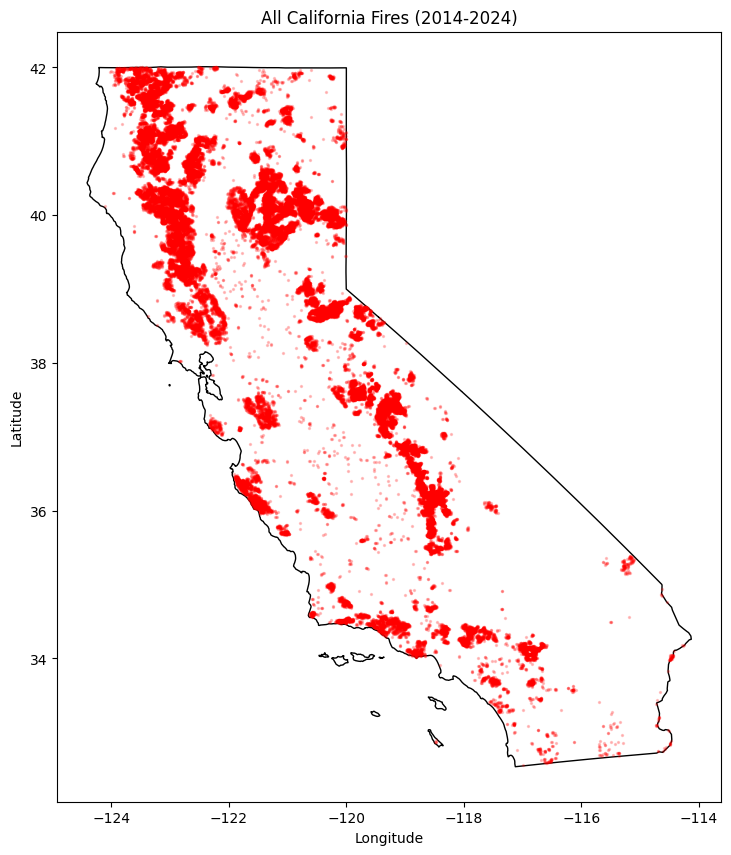

In [13]:
plot_fires = fires.copy()

plot_fires['acq_date'] = pd.to_datetime(plot_fires['acq_date'])

gdf = gpd.GeoDataFrame(
    plot_fires,
    geometry=gpd.points_from_xy(plot_fires.longitude, plot_fires.latitude),
    crs="EPSG:4326"
)

california = gpd.read_file(
    "https://raw.githubusercontent.com/glynnbird/usstatesgeojson/master/california.geojson"
)

# Plot
fig, ax = plt.subplots(figsize=(10,10))
california.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, markersize=2, alpha=0.2, color='red')

plt.title("All California Fires (2014-2024)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
